# 3. データ表現と特徴量エンジニアリング

# 3.1 カテゴリ変数と連続値変数

特徴量には、カテゴリを表すものと、連続値を表すものがあり、機械学習モデルに与える前に適切に前処理を行う必要がある。

- カテゴリ変数 - 離散値。ラベルのようなもの
  例: 性別、婚姻状態など
  注意: 数値データのように見えても、カテゴリとして扱うべきものも多い  
  例: 郵便番号、電話のエリア番号など

- 連続値変数 - 数値データ
  例: 価格

- 順序付き変数 - 離散値だが、明らかに順序のあるもの  
  例: 成績 (優、良、可、不可)

例: 国勢調査の結果から、収入が50Kドル以上かどうかを予測するデータセット

In [38]:
# hide
# Download
DATASET = (
    "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names",
    "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",
)
import subprocess
from pathlib import Path

def download():
    for u in DATASET: 
        f = u.split("/")[-1]
        subprocess.run(["curl", u, "-o", str(Path("data") / f)])
# download()        
import pandas as pd
file_name = "data/adult.data"

labels = """age
workclass
fnlwgt
education
education-num
marital-status
occupation
relationship
race
sex
capital-gain
capital-loss
hours-per-week
native-country
target""".split("\n")

df = pd.read_csv(file_name, header=None, names=labels)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [39]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [40]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

## 3.2 One-Hot Encoding

- カテゴリ変数を機械学習モデルで扱うには何らかの方法で数値に変換しなければならない。
- 個々のカテゴリ値ごとにそれぞれ1-0特徴量を割当てる。  
   例: 特徴量X が A,B,C,D の4つの値をとるとする。それぞれ特徴量 A,B,C,D を導入し、1,0を割り当てる。

動作がわかりやすいように、特徴量を3つだけに絞って変換してみる。

In [41]:
# 特徴量を減らしたデータフレームを作る
shrinked = df[['age', 'workclass', 'target']]
shrinked

,age,workclass,target
0,39,State-gov,<=50K
1,50,Self-emp-not-inc,<=50K
2,38,Private,<=50K
3,53,Private,<=50K
4,28,Private,<=50K
...,...,...,...
32556,27,Private,<=50K
32557,40,Private,>50K
32558,58,Private,<=50K
32559,22,Private,<=50K


In [42]:
# One-hot encodeを行う
pd.get_dummies(shrinked)

,age,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,target_ <=50K,target_ >50K
0,39,0,0,0,0,0,0,0,1,0,1,0
1,50,0,0,0,0,0,0,1,0,0,1,0
2,38,0,0,0,0,1,0,0,0,0,1,0
3,53,0,0,0,0,1,0,0,0,0,1,0
4,28,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,0,0,0,1,0,0,0,0,1,0
32557,40,0,0,0,0,1,0,0,0,0,0,1
32558,58,0,0,0,0,1,0,0,0,0,1,0
32559,22,0,0,0,0,1,0,0,0,0,1,0


連続値特徴量である`age`はそのままで、`workclass`と`target`が複数の0/1特徴量に変換されたことがわかる。

全体に対してOne-hotエンコードを行い、学習してみる。

In [52]:
# One-hot エンコード
df_e = pd.get_dummies(df)

In [57]:
# 目標変数を切り出し
target = df_e['target_ <=50K']
# 目標変数をデータフレームから削除
df_e = df_e.drop(columns=['target_ <=50K', 'target_ >50K'])

In [59]:
# データフレームのままでは学習できないので、numpy配列に変換する
df_e.to_numpy()

array([[    39,  77516,     13, ...,      1,      0,      0],
       [    50,  83311,     13, ...,      1,      0,      0],
       [    38, 215646,      9, ...,      1,      0,      0],
       ...,
       [    58, 151910,      9, ...,      1,      0,      0],
       [    22, 201490,      9, ...,      1,      0,      0],
       [    52, 287927,      9, ...,      1,      0,      0]])

In [60]:
# 目標変数も変換する
target.to_numpy()

array([1, 1, 1, ..., 1, 1, 0], dtype=uint8)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_e.to_numpy(), target.to_numpy(), random_state=1)

model = LogisticRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

In [71]:
import numpy as np
from sklearn.metrics import accuracy_score
print(np.mean((predicted == y_test)))
print(accuracy_score(predicted, y_test))

0.8073946689595872
0.8073946689595872


In [76]:
from sklearn.ensemble import RandomForestClassifier

def eval_classifier(mdl, X_train, X_test, y_train, y_test):
    mdl.fit(X_train, y_train)
    print("{}\ttrain: {}\ttest: {}".format(
        mdl.__class__.__name__,
        accuracy_score(mdl.predict(X_train), y_train), 
        accuracy_score(mdl.predict(X_test), y_test)))
eval_classifier(RandomForestClassifier(), X_train, X_test, y_train, y_test)


RandomForestClassifier	train: 0.9999590499590499	test: 0.8597223928264341


In [77]:
from sklearn.ensemble import GradientBoostingClassifier
 
eval_classifier(GradientBoostingClassifier(), X_train, X_test, y_train, y_test)

GradientBoostingClassifier	train: 0.8683046683046683	test: 0.8699177005281906


In [78]:
eval_classifier(LogisticRegression(), X_train, X_test, y_train, y_test)

LogisticRegression	train: 0.793980343980344	test: 0.8073946689595872


## 3.3 多項式特徴量

- 特徴量エンジニアリング
    特徴量を工夫することで同じモデルでもより正確な予測が可能になる

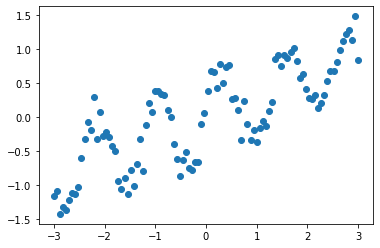

In [105]:
# データを作る
# 1次間数 + サインカーブ + ガウシアンノイズ
import numpy as np
import matplotlib.pyplot as plt
a, b, f, s = 0.3, 0.5, 5, 0.2

Xp = np.linspace(-3, 3, 100)
y = a * Xp + b * np.sin(Xp * f) + np.random.normal(scale=s, size=Xp.shape)
X = Xp.reshape(-1, 1)
plt.scatter(Xp, y)

In [118]:
#  線形回帰で学習する
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()
mdl.fit(X, y)
# 学習された線の確認
mdl.coef_, mdl.intercept_

(array([0.31341169]), 0.002433400530341514)

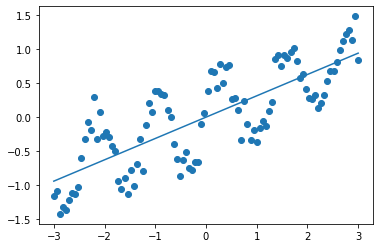

In [119]:
# 可視化
plt.scatter(X, y)
plt.plot(Xp, mdl.predict(X))

通常の線形回帰では十分に近似できていない

#### 多項式特徴量
入力特徴量の2乗、3乗...を加える。

In [124]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly.shape

(100, 15)

In [125]:
poly.get_feature_names()

['x0',
 'x0^2',
 'x0^3',
 'x0^4',
 'x0^5',
 'x0^6',
 'x0^7',
 'x0^8',
 'x0^9',
 'x0^10',
 'x0^11',
 'x0^12',
 'x0^13',
 'x0^14',
 'x0^15']

これらの新たに追加された特徴量を用いて学習する。

In [126]:
mdl.fit(X_poly, y)
mdl.coef_, mdl.intercept_

(array([ 3.00794984e+00, -3.73316989e-01, -9.93337458e+00,  4.99519567e-01,
         1.05707487e+01, -3.24575018e-01, -4.99012462e+00,  1.13653532e-01,
         1.21905946e+00, -2.09550022e-02, -1.61089756e-01,  1.89769121e-03,
         1.09591055e-02, -6.63787420e-05, -3.01464967e-04]),
 0.05714086095016166)

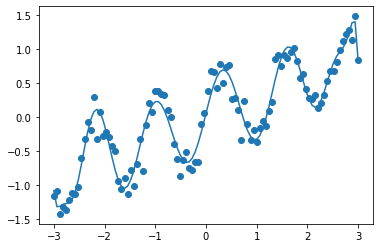

In [127]:
# 可視化
plt.scatter(X, y)
plt.plot(Xp, mdl.predict(X_poly))

## 3.4 特徴量選択
- 特徴量を増やすことは簡単にできる
- しかしすべての特徴量が学習に有効とは限らない
- 目標変数の予測に役に立たないと思われる特徴量を削ることで、性能を向上させることができる(場合がある)
- モデルの意味を解釈する上でも関与する特徴量が少ないほうがいい

乳癌データセットを用いる。無効な特徴量を模すために、ランダムな特徴量を加える。

In [189]:
# データのロード

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
ss = StandardScaler()
X_org = cancer.data
rnd = np.random.RandomState(42)
# ノイズの生成と追加
noise = rnd.normal(size=(len(cancer.data), 50))
X_add = np.hstack([X_org, noise])

# 標準化
ss.fit(X_add)
X = ss.transform(X_add)
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape

(398, 80)

もともとの30の特徴量に対してノイズを50加えた。

### 単変量特徴量選択

- 個々の特徴量と目標変数の相関を見る
- 複数の特徴量が集まって影響するようなものはうまく検出できない

In [190]:
from sklearn.feature_selection import SelectPercentile

select = SelectPercentile(percentile=40)
select.fit(X_train, y_train)

X_selected = select.transform(X_train)
X_selected.shape


(398, 32)

特徴量が80から32に減ったことがわかる。

削除された特徴量を確認する。

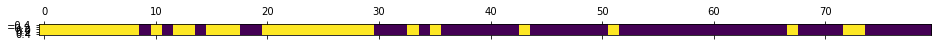

In [194]:
plt.matshow(select.get_support().reshape(1, -1))

- ノイズでも残ってしまっているものもある
- もともと含まれていたものもいくつか落とされてしまっている

In [195]:
# 特徴量選択を行わない場合の性能
mdl = LogisticRegression()
mdl.fit(X_train, y_train)
y_predict = mdl.predict(X_test)
accuracy_score(y_test, y_predict)


0.935672514619883

In [196]:
# 特徴量選択後の性能
mdl = LogisticRegression()
mdl.fit(X_selected, y_train)
y_predict = mdl.predict(select.transform(X_test))
accuracy_score(y_test, y_predict)


0.9649122807017544

### モデルベース特徴量選択

- モデルによっては、個々の特徴量の重要性指標を出力するものがある。この指標を用いて特徴量を選択する
- 特徴量選択に用いるモデルと、最終的なターゲットモデルは同じである必要はない


In [202]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(random_state=42), max_features=30)
select.fit(X_train, y_train)

X_selected = select.transform(X_train)
X_selected.shape



(398, 18)

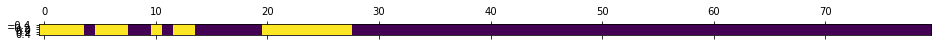

In [203]:
plt.matshow(select.get_support().reshape(1, -1))

In [204]:
# 特徴量選択後の性能
mdl = LogisticRegression()
mdl.fit(X_selected, y_train)
y_predict = mdl.predict(select.transform(X_test))
accuracy_score(y_test, y_predict)

0.9883040935672515

### 反復特徴量選択

- 寄与の小さい特徴量を削除する
- これを予め決めた数になるまで繰り返し行う
- 重要性指標を出力することのできるモデルが必要

In [207]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

select = RFE(RandomForestClassifier(random_state=42), n_features_to_select=20)
select.fit(X_train, y_train)

X_selected = select.transform(X_train)
X_selected.shape


(398, 20)

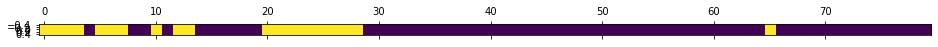

In [208]:
plt.matshow(select.get_support().reshape(1, -1))

In [209]:
# 特徴量選択後の性能
mdl = LogisticRegression()
mdl.fit(X_selected, y_train)
y_predict = mdl.predict(select.transform(X_test))
accuracy_score(y_test, y_predict)

0.9941520467836257